# Инжиниринг численных признаков

# Из методички

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Первоначальное знакомство с данными**

Мы поработаем с датасетом, содержащим информацию о разных численных показателях качества воздуха.

In [66]:
prsa_data = pd.read_csv("PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


Мы видим несколько атрибутов, характеризующих количество примесей различных газов при измерении качества воздуха. Последняя категориальная переменная в этом датасете - целевая, она обозначает класс чистоты воздуха.

In [67]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [68]:
prsa_data.describe() # численная статистика по данным

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


**Идентификация ошибочных значений**

Первым этапом анализа данных должно быть устранение явных ошибок в данных - значений атрибутов вне разумного диапазона.

Значение концентрации газа в воздухе просто по смыслу не может быть отрицательным. При этом во всем датасете во всех колонках присутствует только одно отрицательное значение (убедитесь в этом самостоятельно): -1. Скорее всего, так в датасете обозначаются неизвестные значения.

In [69]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


**Визуализация распределения атрибутов**

<Axes: xlabel='SO2', ylabel='Count'>

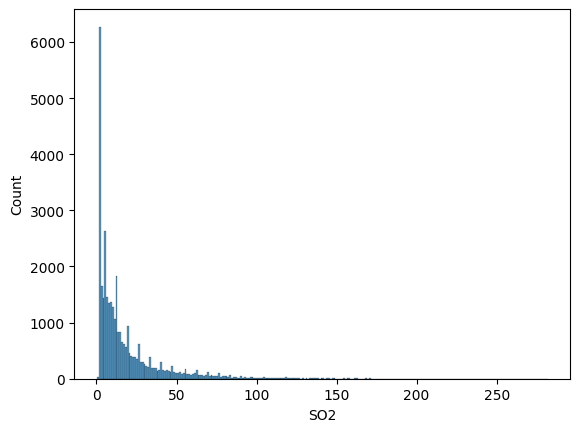

In [70]:
sns.histplot(prsa_data.SO2)

Налицо явная зависимость - чем меньше значение, тем оно вероятнее. Очень большие концентрации встречаются крайне редко. Плюс, на графике можно заметить определенные пики через равные промежутки значений. Это может свидетельствовать о попытках заполнения пропущенных значений или об округлении некоторых значений.

<Axes: xlabel='NO2', ylabel='Density'>

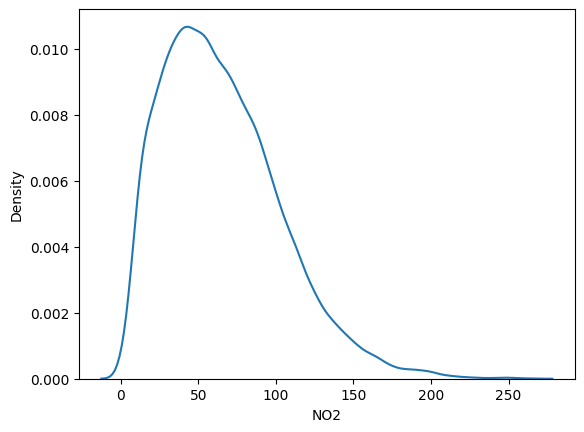

In [71]:
sns.kdeplot(prsa_data.NO2) # график ядерной оценки плотности распределения

Но обратите внимание, что оценка плотности подразумевает некоторое усреднение. Поэтому не удивляйтесь тому, что график немного заходит на отрицательную область.

<Axes: xlabel='CO', ylabel='Count'>

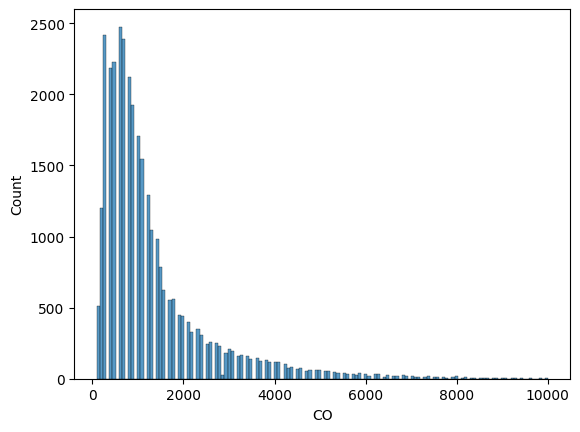

In [72]:
sns.histplot(prsa_data.CO)

Здесь видно достаточно гладкое распределение с модой в районе 1000.

<Axes: xlabel='O3', ylabel='Count'>

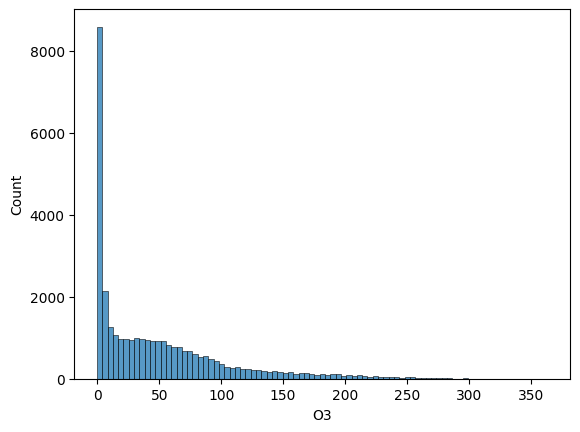

In [73]:
sns.histplot(prsa_data.O3)

На гистограмме явно видно, что нулевая концентрация встречается гораздо чаще ненулевых значений.

Распределение значения давления отличается от всех предыдущих. Видно, что есть некоторый диапазон условно равновероятных, "нормальных" значений, а частота значений давления вне этого диапазона быстро спадает.

<Axes: xlabel='PRES', ylabel='Count'>

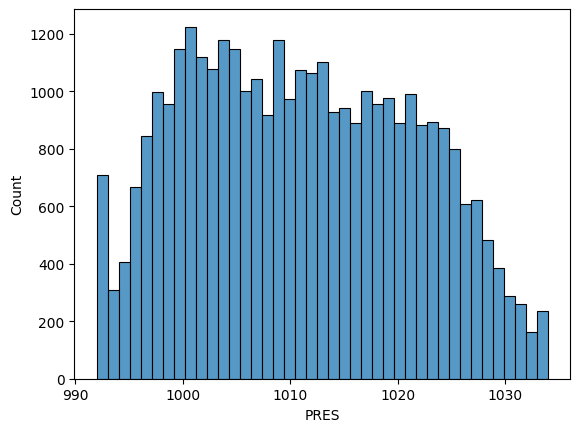

In [102]:
sns.histplot(prsa_data.PRES)

Распределение количества осадков тоже особенное. Мы видим, что отсутствие осадков - самое распространенное значение. Ненулевые значения тут встречаются в подавляющем меньшинстве точек данных.

<Axes: xlabel='RAIN', ylabel='Count'>

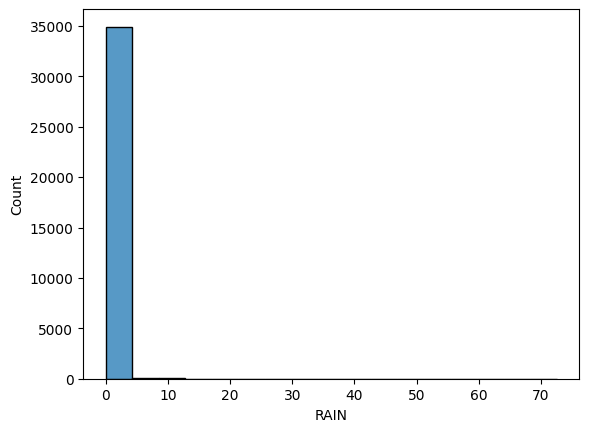

In [75]:
sns.histplot(prsa_data.RAIN)

<Axes: xlabel='WSPM', ylabel='Count'>

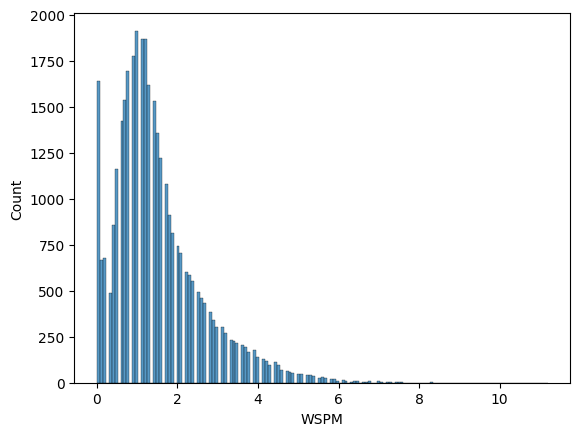

In [76]:
sns.histplot(prsa_data.WSPM)

**Бинаризация атрибутов**

Распределение атрибута "количество осадков" может снизить эффективность модели, так как численное значение малоинформативно по сравнению с фактом наличия осадков. В датасете лишь 1436 из 35 000 точек имеют ненулевое значение, поэтому лучше превратить этот атрибут в категориальный.

In [77]:
prsa_data.RAIN[prsa_data.RAIN > 0]

,RAIN
267,0.1
268,0.4
269,0.1
270,0.9
271,0.9
...,...
34891,0.2
34892,0.7
34893,0.9
34894,0.4


Мы можем ввести в модель новый категориальный, а точнее, бинарный атрибут, кодирущий наличие либо отсутствие осадков в данном измерении.

In [78]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


**Визуализация связи атрибутов с целевой переменной**

Мы получим на графике несколько линий, каждая из которых соответствует распределению выбранного атрибута при разных значениях целевой переменной.

<Axes: xlabel='SO2', ylabel='Density'>

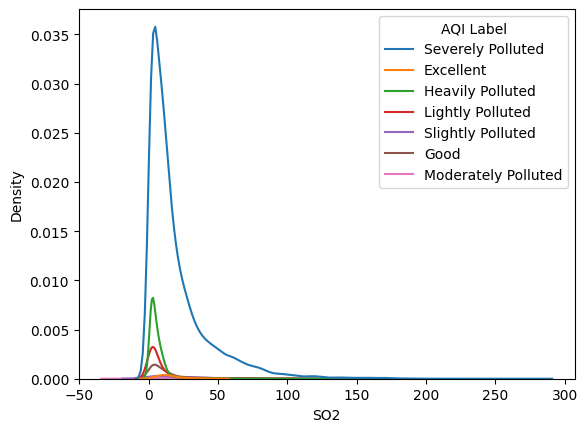

In [79]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

Из-за дисбаланса классов важна не точная высота линий на графике, а выявление участков по горизонтальной оси, где соотношение классов заметно меняется.

Явных изменений в форме разных линий нет. Можно предположить, что изолированно данный атрибут не сильно влияет на значение целевой переменной.

<Axes: xlabel='NO2', ylabel='Density'>

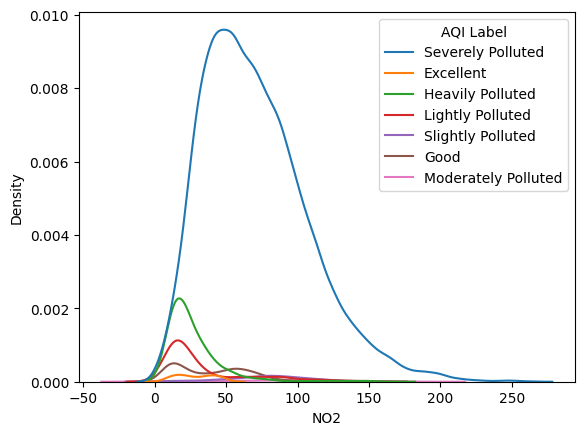

In [80]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

Здесь уже видны различия между соотношениям разных классов. Но они не очень ярко выраженные.

<ipython-input-81-0dcfe490e9c4>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

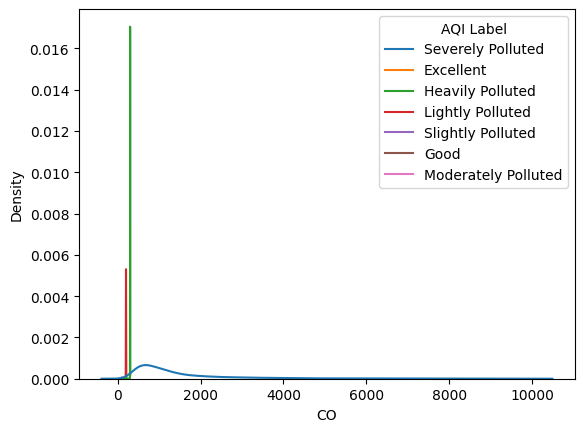

In [81]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

Данный график очень смещен из-за того, что плотности некоторых классов сильно сконцентрированы, что искажает масштаб графика. В таких случаях помогает попробовать изобразить этот же график, но с логарифмическим масштабом вертикальной оси.

<ipython-input-82-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

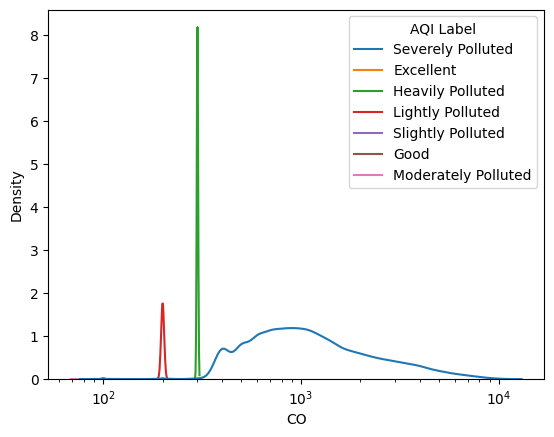

In [82]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

На некоторых участках диапазона значений данного атрибута преобладает значение "Lightly polluted", на других - "Heavily polluted". Это значит, что данный атрибут очень важен для предсказания значения целевой переменной. В дальнейшем мы используем эту информацию для категоризации этого атрибута.

<Axes: xlabel='O3', ylabel='Density'>

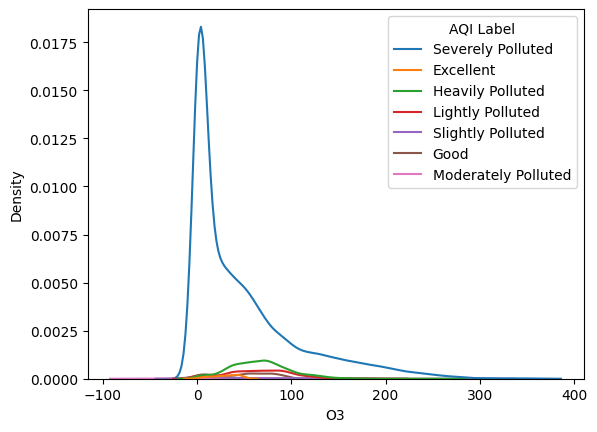

In [83]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

<Axes: xlabel='PRES', ylabel='Density'>

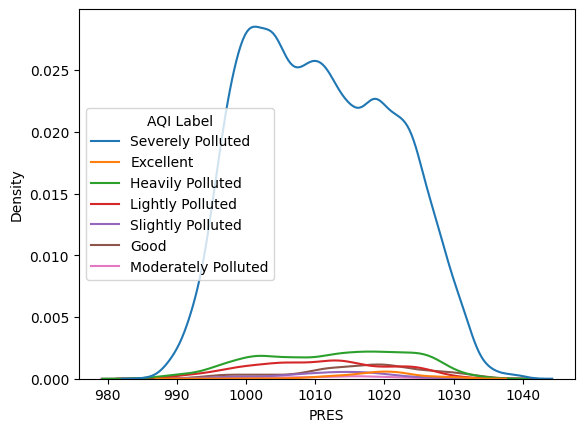

In [84]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label")

<Axes: xlabel='WSPM', ylabel='Density'>

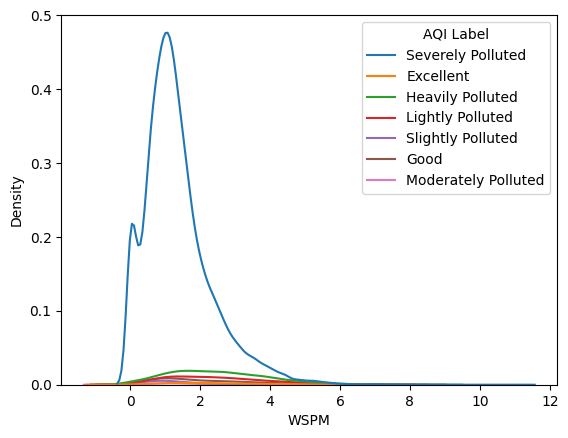

In [85]:
sns.kdeplot(data=prsa_data, x="WSPM", hue="AQI Label")

**Группировка численных значений**

Для значения целевой переменной не так важно конкретное численной значение концентрации CO в воздухе. Достаточно информации, в какой диапазон попадает данное измерение. Поэтому попробуем добавить к датасету атрибут "Группа по CO".

In [86]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


Поскольку в исходном столбце были пропуски, они появятся и в новом категориальном атрибуте. Проще всего заполнить их специальным классом, например, "0" — означающим "значение неизвестно".

In [87]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


**Удаление экстремальных значений**

Особый интерес при анализе вызывают распределения с длинными "хвостами" — редкими значениями, сильно отличающимися от большинства. Такие выбросы часто указывают на ошибки или нерелевантные объекты, которые стоит удалять, так как они могут ухудшать работу моделей.

Для очистки данных можно удалять объекты с экстремальными значениями по порогу или процентилю, но при этом теряется информация из других признаков. Альтернативно применяют клиппинг — замену экстремальных значений на границы.

Например, в колонке "PRES" можно задать границы вручную и заменить значения за их пределами.

In [88]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<ipython-input-88-5a60bf876b2e>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prsa_data.PRES[prsa_data.PRES <= 992] = 992
<ipython-input-88-5a60bf876b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

<Axes: xlabel='PRES', ylabel='Count'>

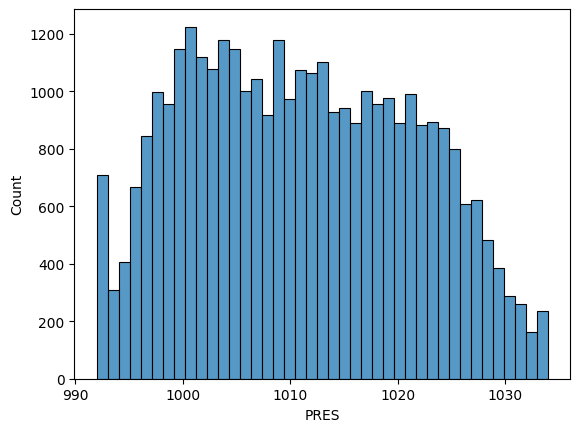

In [104]:
sns.histplot(data=prsa_data, x="PRES")

**Заполнение пропусков**

<Axes: >

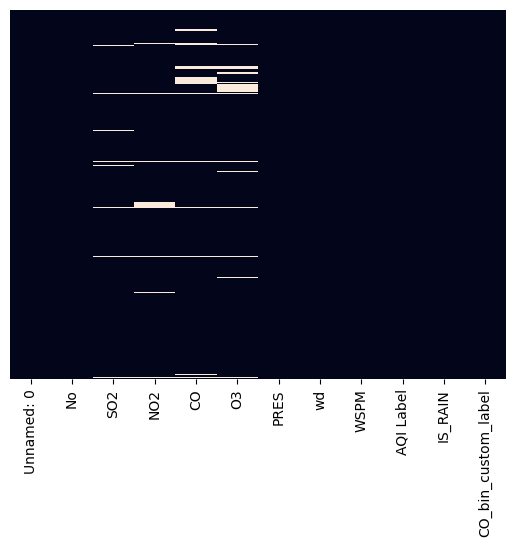

In [90]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Можно обратить внимание на то, что в датасете прослеживаются горизонтальные полосы. Это объекты, по которым неизвестны значения нескольких атрибутов. Можно вывести индексы объектов, у которых неизвестно значение более двух атрибутов.

In [91]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

,0
3,2
276,3
435,2
459,2
555,2
...,...
34880,4
34883,4
34885,4
35029,2


Так как такие незаполненные объекты составляют очень малый процент выборки, для простоты обработки их можно просто удалить.

In [92]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

<Axes: >

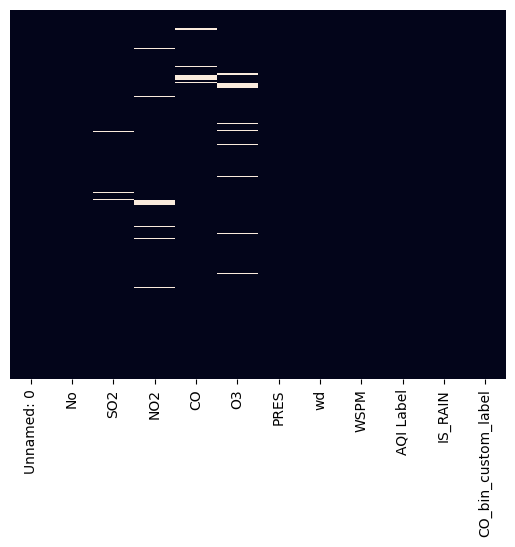

In [93]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [94]:
prsa_data.isnull().sum()

,0
Unnamed: 0,0
No,0
SO2,281
NO2,702
CO,1028
O3,1300
PRES,0
wd,0
WSPM,0
AQI Label,0


По столбцу SO2 пропущено всего 281 значение. Это менее одного процента выборки. Можно просто заменить пропуски на среднее значение. Но так как эмпирическое распределение этого признака имеет большую асимметрию, лучше использовать медиану.

In [95]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

O3 искажение будет более существенным. Поэтому воспользуемся заполнением не средним, а случайным значением. Для этого сначала сформируем временную серию, содержащую все пропуски из данного столбца.

In [96]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [97]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [98]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

**Округление атрибутов**

В датасете все численные значения имеют по одному знаку после запятой, кроме столбца O3 с пятью знаками. Такая точность избыточна — достаточно округлить значения, чтобы избавиться от лишних данных.

In [99]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


**Логарифмирование атрибутов**

Кастомное решкалирование — изменение шкалы атрибута — полезно в некоторых случаях. Например, в столбце SO2 значения сильно смещены: много маленьких и мало больших. Модели лучше работают с более равномерным распределением. Чтобы уменьшить дисбаланс, можно применить монотонную и непрерывную функцию, например, логарифм, для преобразования данных.

In [100]:
prsa_data.SO2 = np.log(prsa_data.SO2)

<Axes: xlabel='SO2', ylabel='Count'>

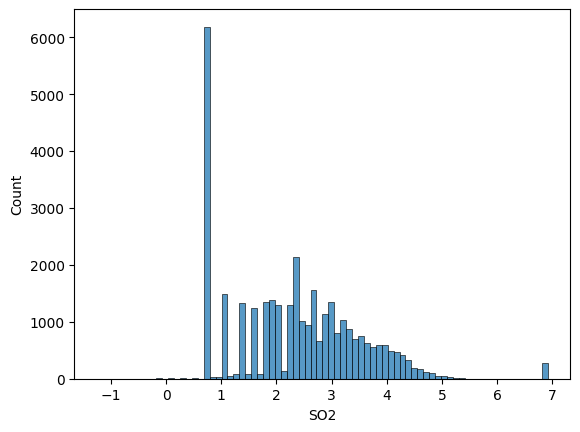

In [105]:
sns.histplot(prsa_data.SO2)

# Задания для самостоятельного выполнения

*1. При выполнении 3 задания используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.*

Гистограмма показывает, как часто встречаются значения в определённых диапазонах. Она делит весь диапазон значений признака на интервалы (бины) и отображает, сколько наблюдений попадает в каждый из них.

Боксплот фокусируется на основных статистиках распределения. Он показывает медиану, границы первого и третьего квартилей, а также выбросы — значения, выходящие за пределы условно допустимого диапазона.

Вайолинплот совмещает в себе преимущества боксплота и сглаженной гистограммы. Он показывает не только медиану и квартильные значения, но и форму самого распределения — плотность значений по шкале.

In [131]:
numeric_cols = prsa_data.select_dtypes(include=['float64', 'int64']).columns[2:-1]

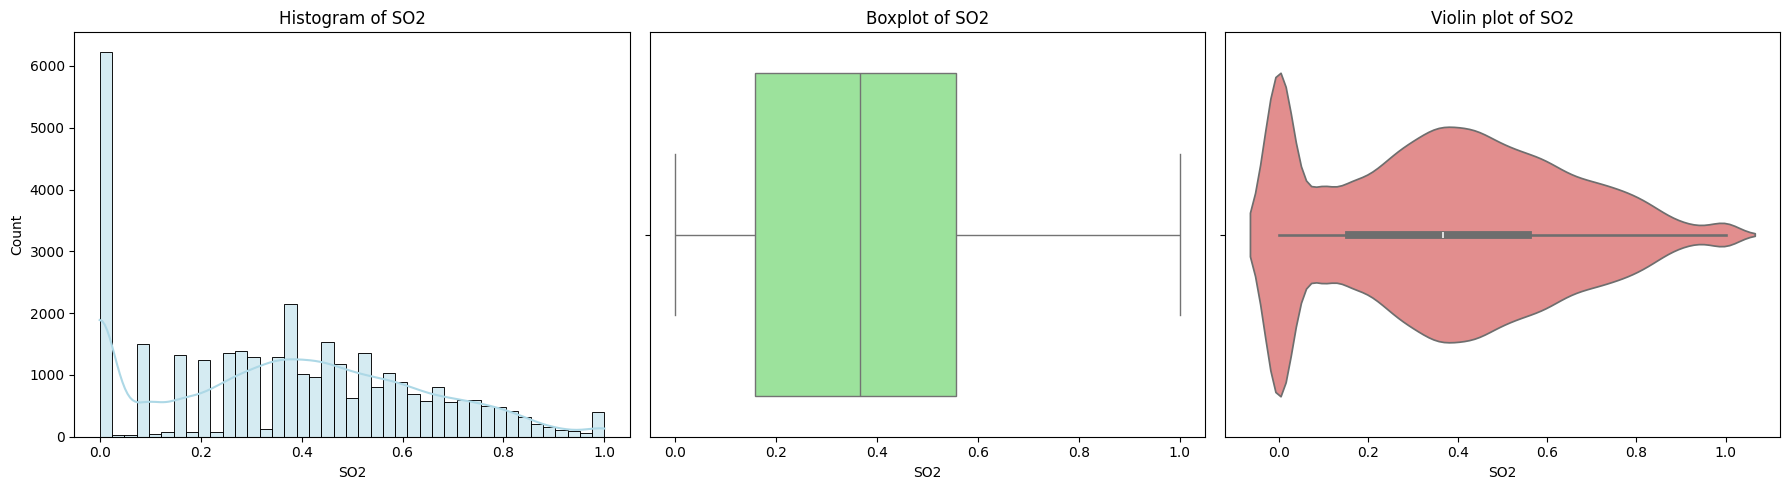

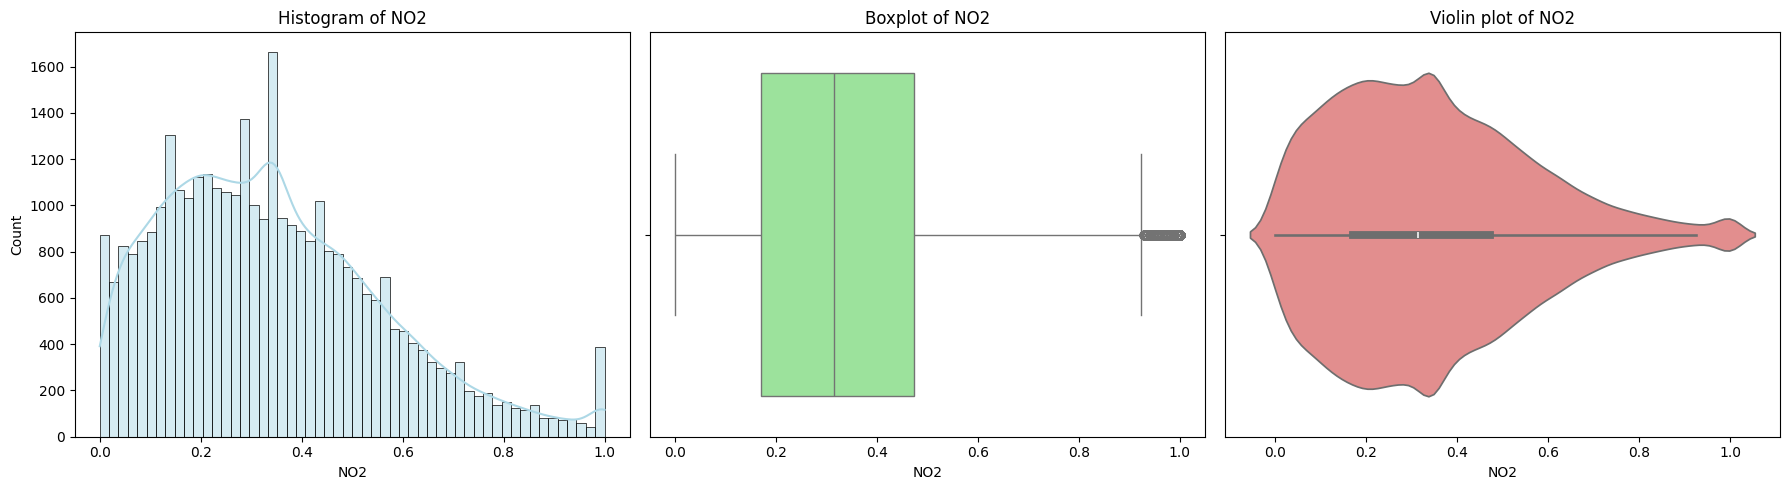

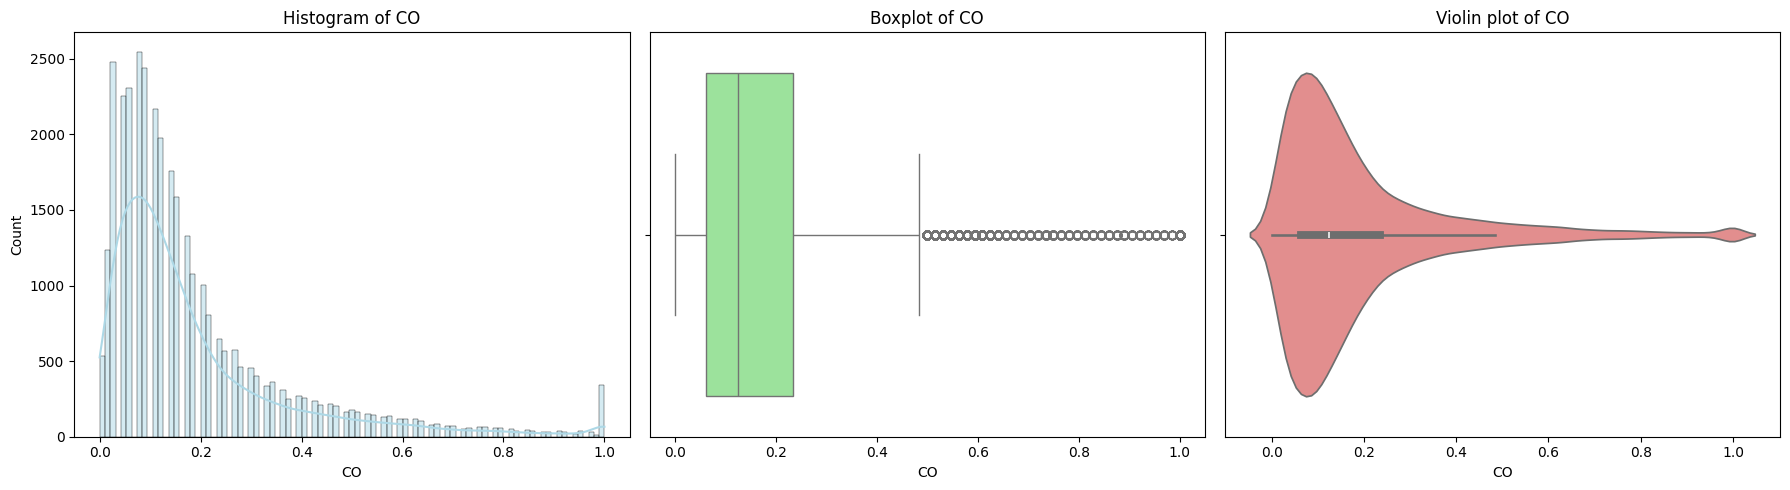

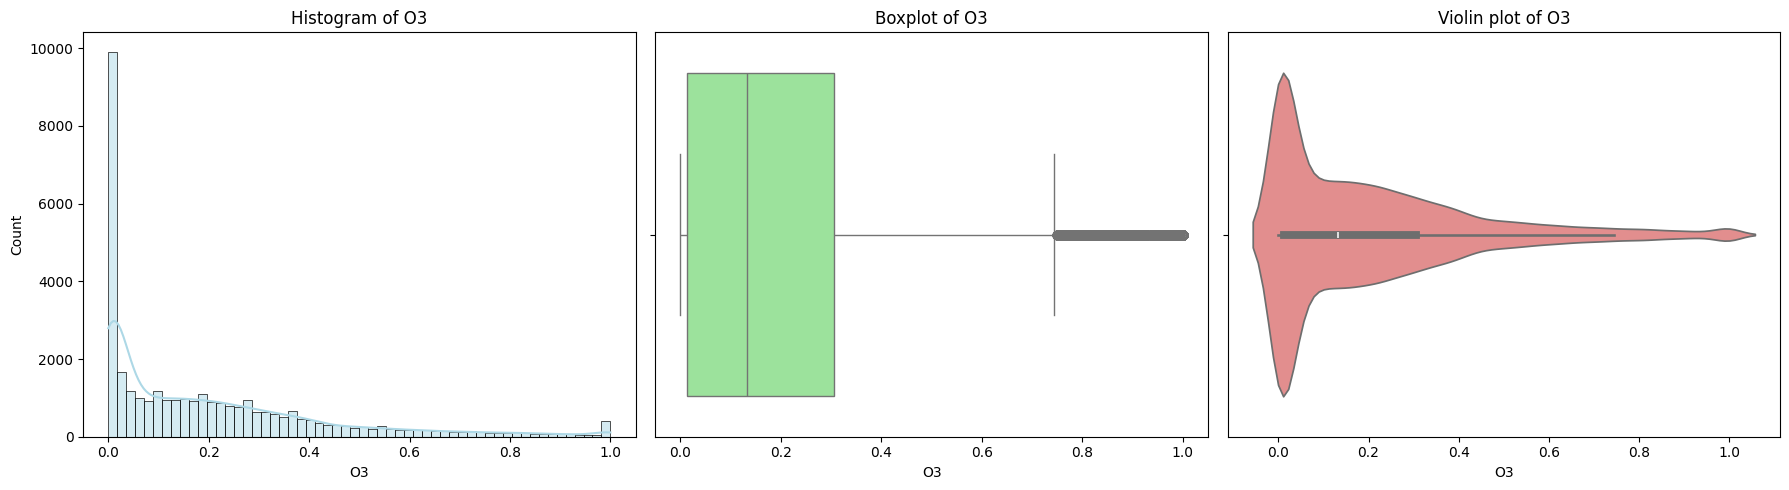

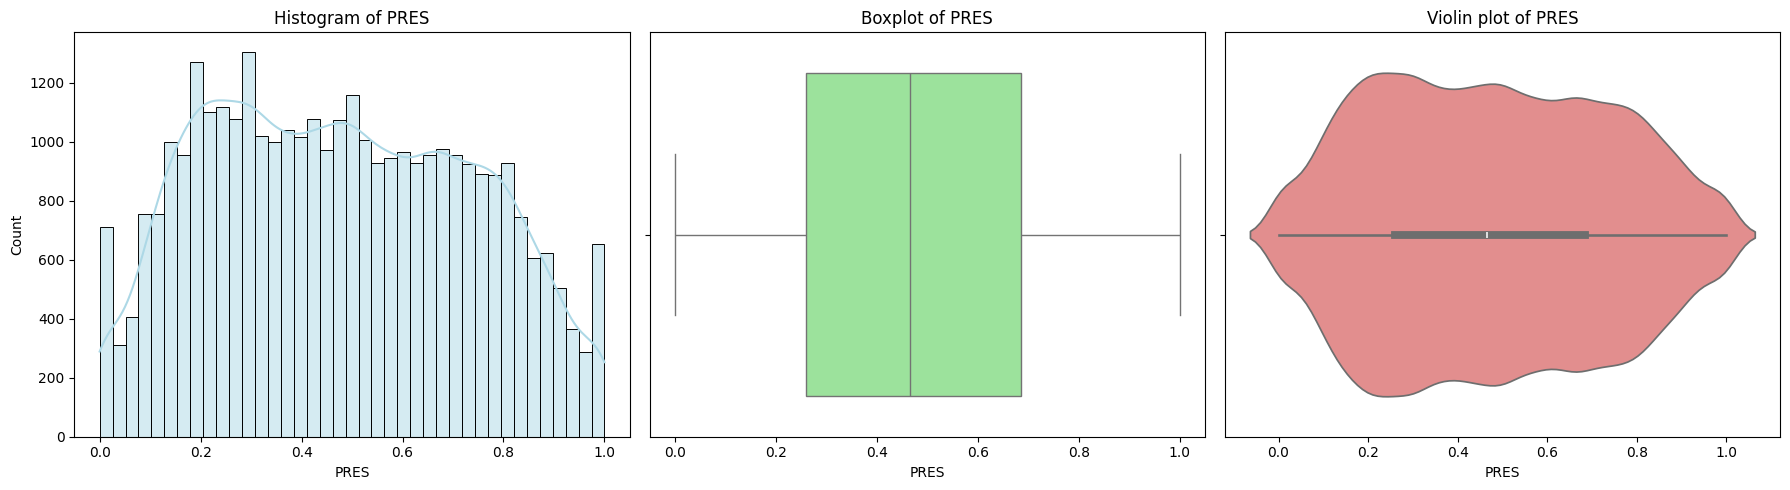

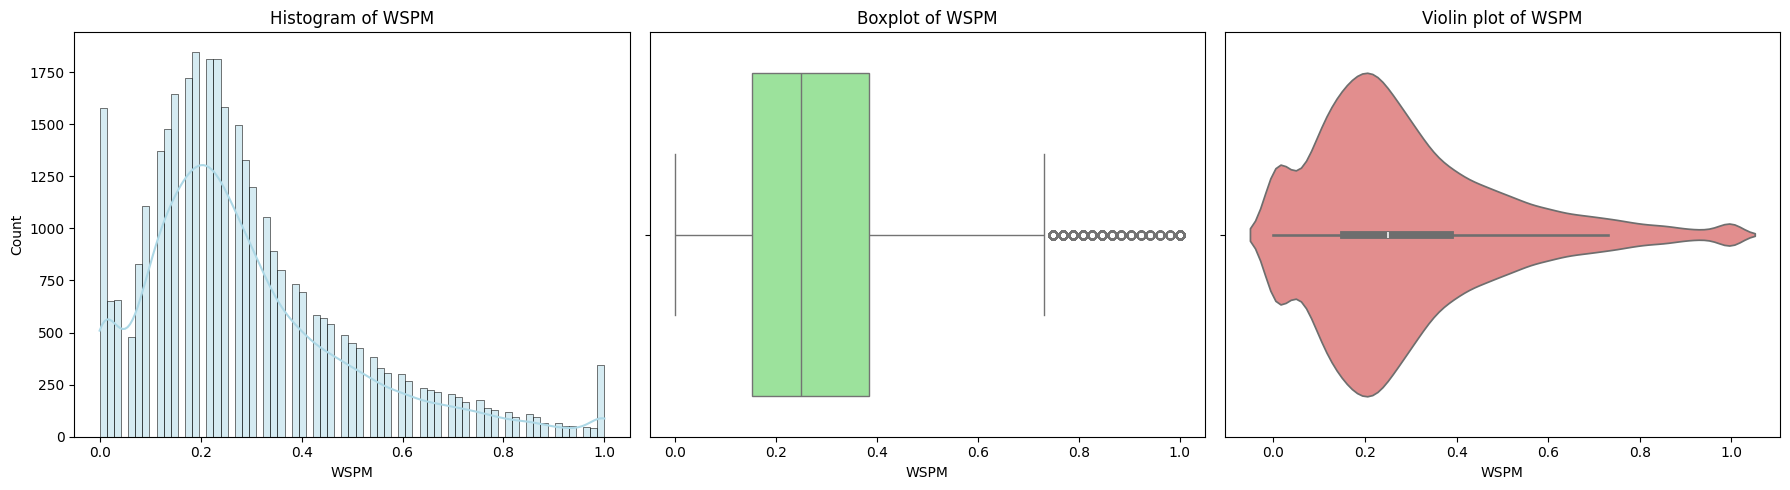

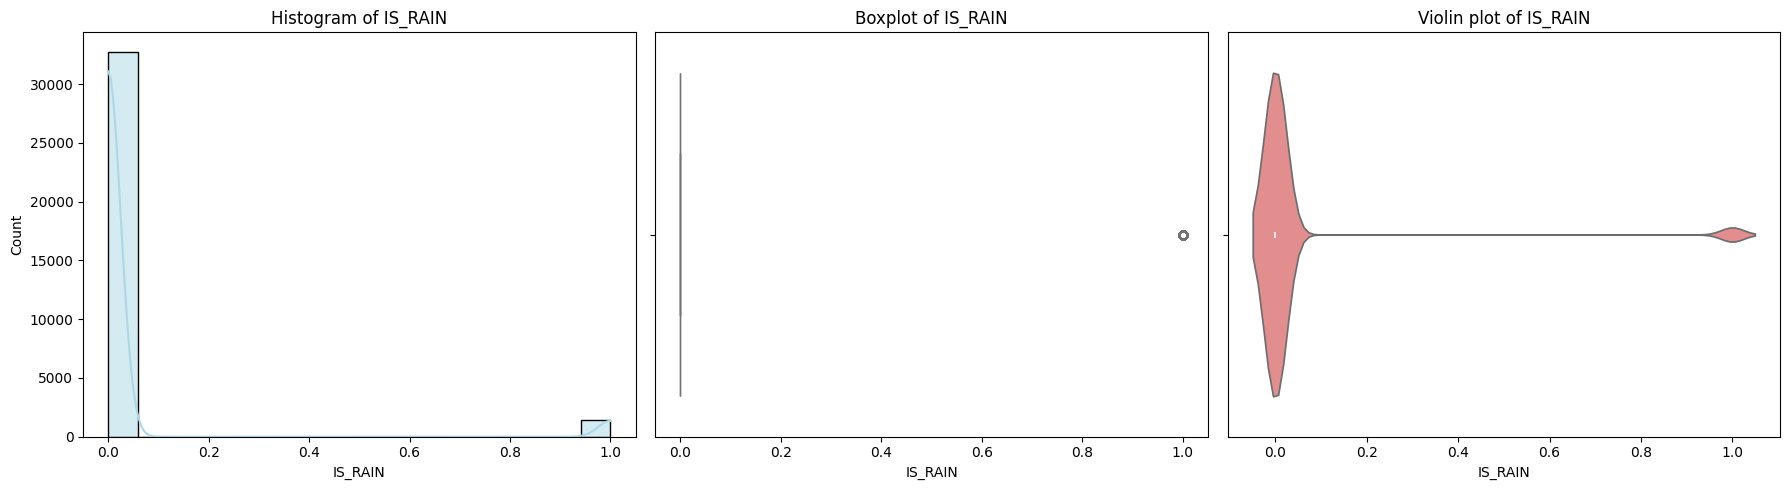

In [132]:
for col in numeric_cols:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(prsa_data[col], kde=True, color='lightblue')
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=prsa_data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 3, 3)
    sns.violinplot(x=prsa_data[col], color='lightcoral')
    plt.title(f'Violin plot of {col}')

    plt.tight_layout()
    plt.show()

*2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.*

Клиппинг по 1 и 99 процентилям — это способ отсечь аномальные данные, оставив "основное тело" распределения, где находится 98% наблюдений.

1-й процентиль — это значение, ниже которого находится 1% наблюдений в данных.

99-й процентиль — значение, ниже которого находится 99% наблюдений, или, наоборот, выше него — только 1%.

In [133]:
for col in numeric_cols:
    lower_bound = prsa_data[col].quantile(0.01)
    upper_bound = prsa_data[col].quantile(0.99)
    prsa_data[col] = np.clip(prsa_data[col], lower_bound, upper_bound)

In [134]:
prsa_data[numeric_cols].describe(percentiles=[.01, .25, .5, .75, .99])

,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,34180.000000,34180.000000,34180.000000,34180.000000,34180.000000,34180.000000,34180.000000
mean,0.371530,0.342007,0.188585,0.202381,0.476092,0.288967,0.041545
std,0.261117,0.218091,0.189346,0.229607,0.257515,0.207466,0.199549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.157955,0.171598,0.062500,0.012764,0.260000,0.153846,0.000000
50%,0.366760,0.314514,0.125000,0.131890,0.465000,0.250000,0.000000
75%,0.556564,0.473373,0.234375,0.306325,0.685000,0.384615,0.000000
99%,1.000000,1.000000,0.984375,0.999821,1.000000,1.000000,1.000000
max,1.000000,1.000000,0.984375,0.999852,1.000000,1.000000,1.000000


Поля min и max совпадают с 1% и 99% процентилями.

*3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.*

In [135]:
prsa_data['SO2'].fillna(prsa_data['SO2'].median(), inplace=True) # заполнение медианой
prsa_data['NO2'].fillna(prsa_data['NO2'].mean(), inplace=True) # заполнение средним

for col in ['CO', 'O3']: # заполнение случайной подстановкой
    missing_values = prsa_data[col].isnull()
    prsa_data.loc[missing_values, col] = prsa_data[col].dropna().sample(missing_values.sum(), replace=True).values

<ipython-input-135-6664c5f87053>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prsa_data['SO2'].fillna(prsa_data['SO2'].median(), inplace=True) # заполнение медианой
<ipython-input-135-6664c5f87053>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [136]:
prsa_data.isnull().sum()

,0
Unnamed: 0,0
No,0
SO2,0
NO2,0
CO,0
O3,0
PRES,0
wd,0
WSPM,0
AQI Label,0


*4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.*

MinMaxScaler — это инструмент для масштабирования данных. Он преобразует значения каждого числового признака так, чтобы они попали в диапазон от 0 до 1.

Cохраняет распределение данных, просто сжимая значения в диапазон [0,1].

In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
prsa_data[numeric_cols] = scaler.fit_transform(prsa_data[numeric_cols])

prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,344.79,0.250353,0.124260,0.047619,0.217013,0.7750,NNW,0.846154,Severely Polluted,0.0,1.000000
1,1,344.79,0.250353,0.124260,0.047619,0.208502,0.7800,N,0.903846,Severely Polluted,0.0,1.000000
2,2,344.79,1.000000,0.071006,0.047619,0.229778,0.7875,NNW,1.000000,Severely Polluted,0.0,1.000000
4,4,344.79,0.342751,0.342007,0.031746,0.225523,0.8300,N,0.384615,Heavily Polluted,0.0,0.666667
5,5,344.79,0.315910,0.059172,0.031746,0.225523,0.8400,N,0.711538,Heavily Polluted,0.0,0.666667


*5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.*

Корреллограмма — это тепловая карта, показывающая степень линейной связи (корреляции) между признаками в наборе данных.

In [138]:
corr_matrix = prsa_data[numeric_cols].corr() # корреляционная матрица

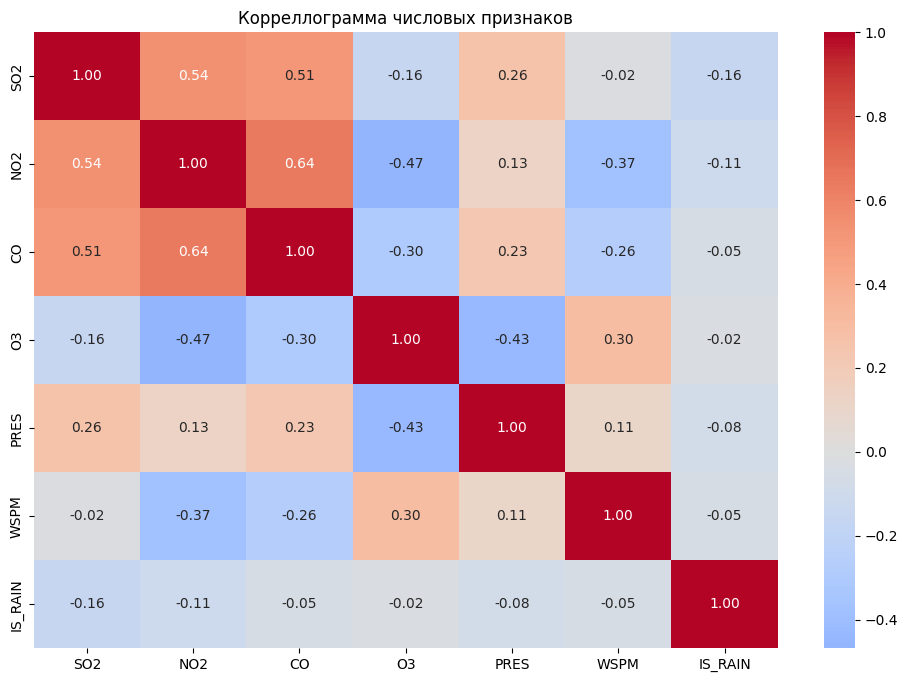

In [139]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреллограмма числовых признаков')
plt.show()

Наиболее значимыми признаками являются NO2, CO и SO2, так как они сильно коррелируют между собой (коэффициенты от 0.51 до 0.64). O3 и PRES также проявляют умеренную связь, особенно с NO2 и друг с другом, но в отрицательную сторону. Остальные признаки, такие как WSPM, IS_RAIN и CO_bin_custom_label, демонстрируют слабые корреляции, что говорит об их незначительном влиянии на другие переменные.

*6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.*

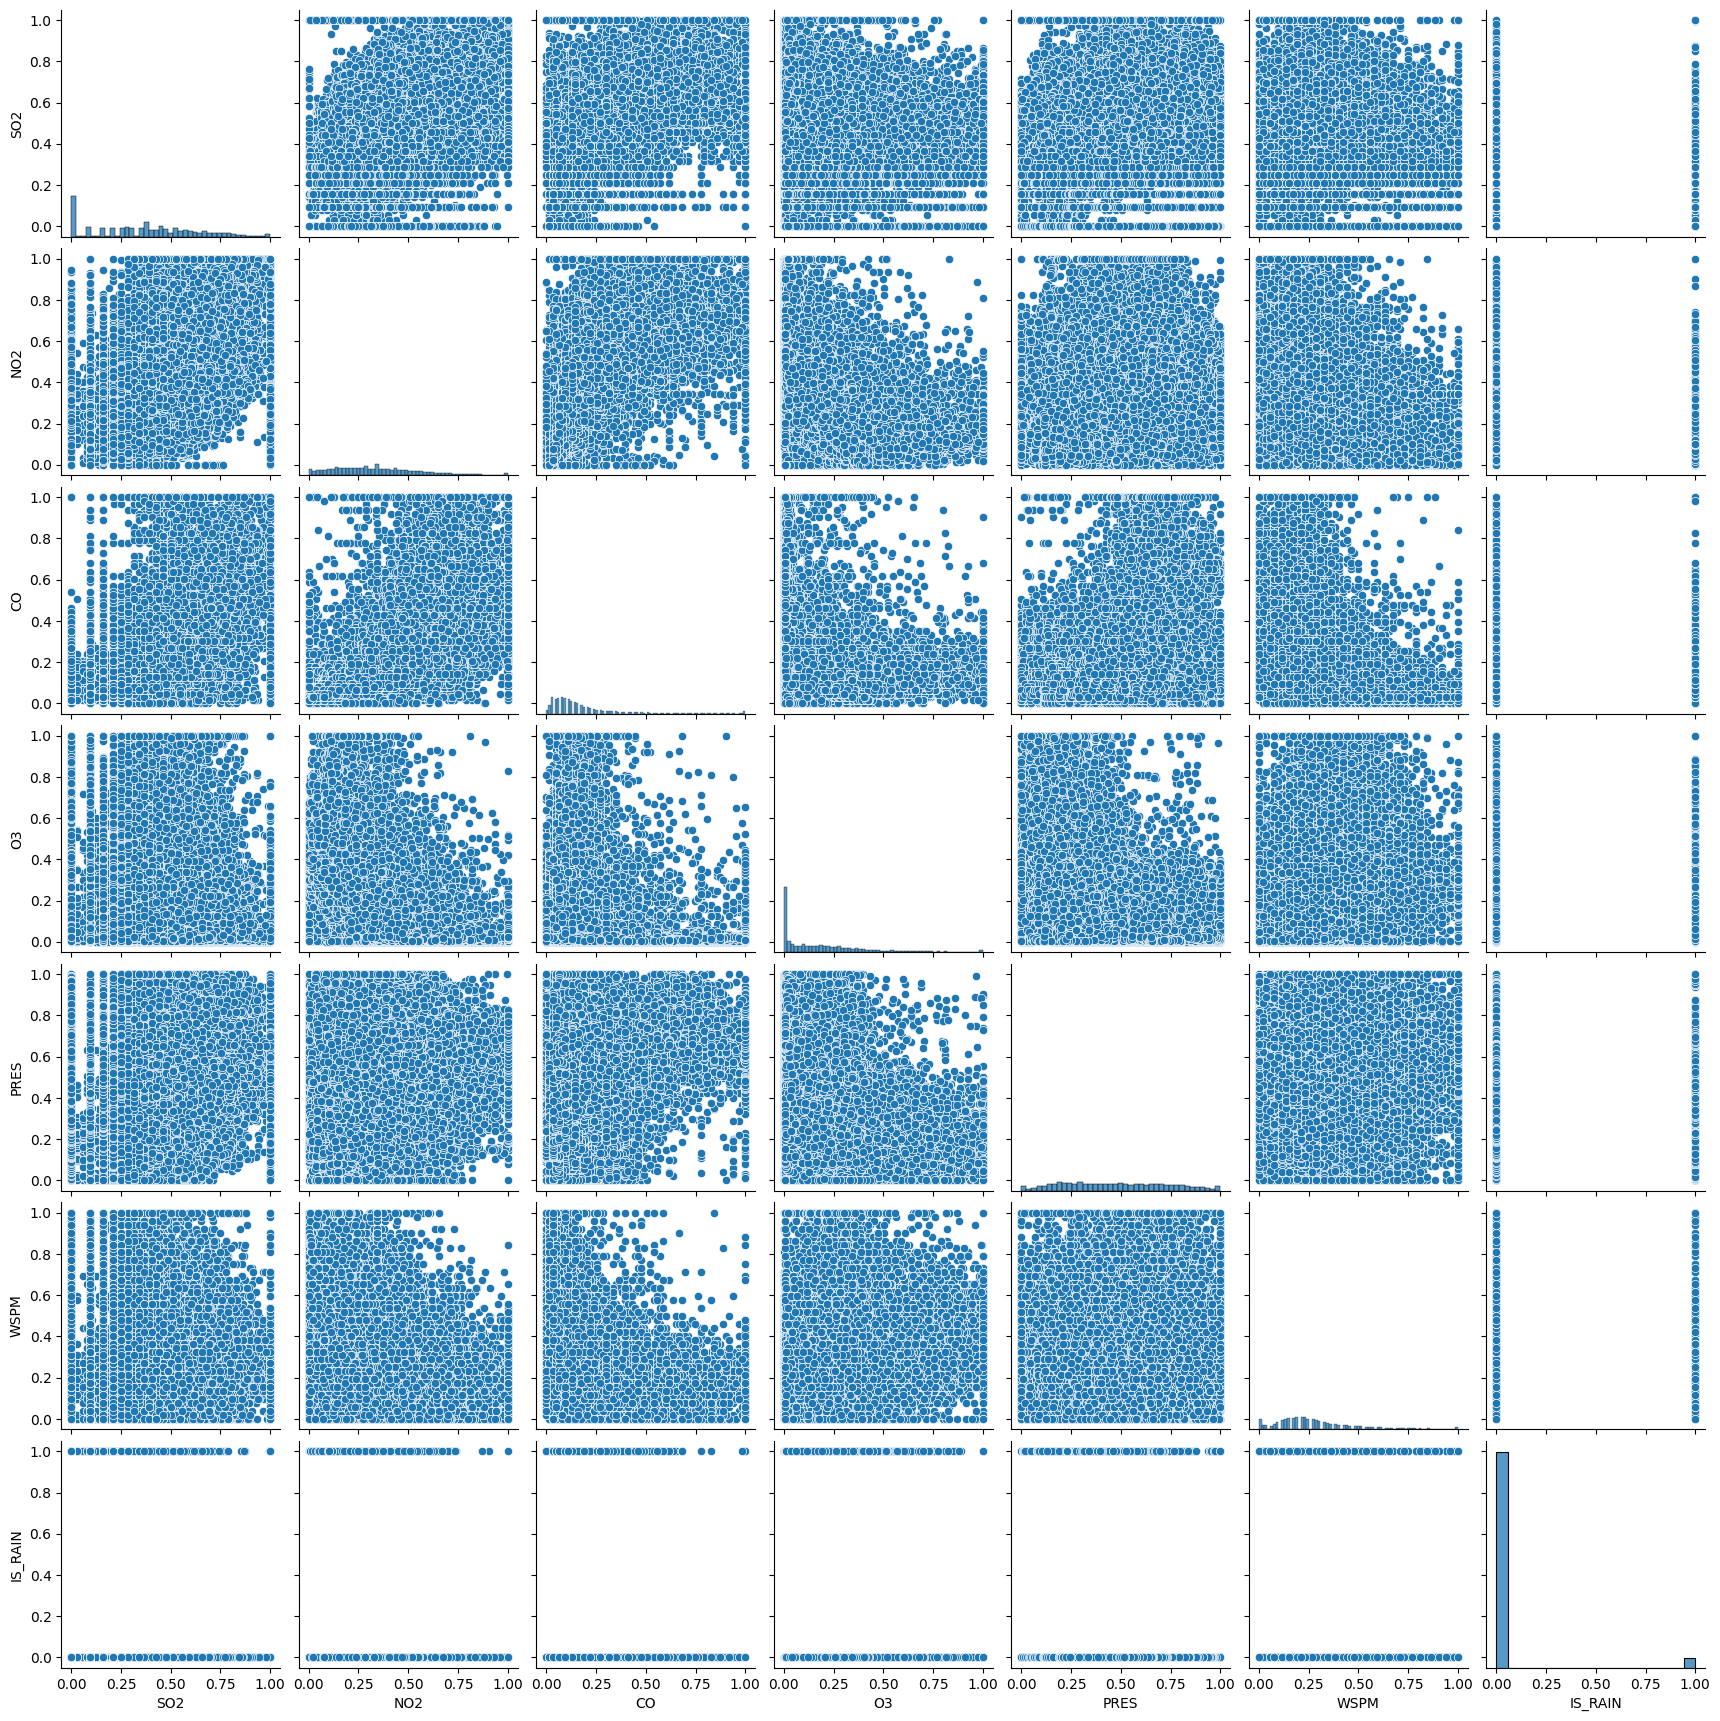

In [143]:
sns.pairplot(prsa_data[numeric_cols]) # парные графики
plt.show()